- –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –±–∏–±–ª–∏–æ—Ç–µ–∫–∏

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
import warnings

- –ü–æ–¥–≥—Ä—É–∂–∞–µ–º –∏ —Å–º–æ—Ç—Ä–∏–º –¥–∞–Ω–Ω—ã–µ

In [2]:
data = pd.read_csv("Bank_data.csv")

# 1. –†–∞–±–æ—Ç–∞ —Å –¥–∞–Ω–Ω—ã–º–∏

- –°–º–æ—Ç—Ä–∏–º –¥–∞–Ω–Ω—ã–µ

In [3]:
data.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   
5     8.0  113755.78              2          1               0   
6     7.0       0.00              2          1               1   
7     4.0  115046.74              4          1               0   
8     4.0  142051.07              2          0               1   
9     2.0  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

> –£–¥–∞–ª—è–µ–º [RowNumber] –∏ [CustomerId], –æ–Ω –Ω–µ –Ω–µ—Å–µ—Ç –∑–Ω–∞—á–∏–º–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏.


In [4]:
data=data.drop(['RowNumber'], axis=1)

In [5]:
data=data.drop(['CustomerId'], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           9091 non-null   float64
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 937.6+ KB


In [7]:
data.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

–û—Ç–º–µ—á–µ–Ω–Ω—ã –Ω–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è —Ç–∏–ø–æ–≤ –¥–∞–Ω–Ω—ã—Ö –≤ —Å–ª–µ–¥—É—é—â–∏—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö:
- [Gender]
- [Tenure]
- [Geography]

- –£–¥–∞–ª–∏–º –¥—É–±–ª–∏–∫–∞—Ç—ã –≤ –¥–∞–Ω–Ω—ã—Ö

In [8]:
# –ü–µ—Ä–≤—ã–π —à–∞–≥: —É–¥–∞–ª—è–µ–º –ø–æ–ª–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã
initial_count = len(data)
data_without_duplicates = data.drop_duplicates(keep='first')
removed_full_duplicates = initial_count - len(data_without_duplicates)
print(f"–£–¥–∞–ª–µ–Ω–æ –ø–æ–ª–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: {removed_full_duplicates}")

# –í—Ç–æ—Ä–æ–π —à–∞–≥: —É–¥–∞–ª—è–µ–º –¥—É–±–ª–∏–∫–∞—Ç—ã –ø–æ –≤—Å–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º –±–µ–∑ —É—á—ë—Ç–∞ target
columns_to_check = [col for col in data.columns if col != "Exited"]
count_before = len(data_without_duplicates)
data = data_without_duplicates.drop_duplicates(subset=columns_to_check, keep='first')
removed_feature_duplicates = count_before - len(data)
print(f"–£–¥–∞–ª–µ–Ω–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º (–±–µ–∑ —É—á—ë—Ç–∞ target): {removed_feature_duplicates}")

print(f"–ò—Ç–æ–≥–æ–≤–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫: {len(data)}")

–£–¥–∞–ª–µ–Ω–æ –ø–æ–ª–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: 0
–£–¥–∞–ª–µ–Ω–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º (–±–µ–∑ —É—á—ë—Ç–∞ target): 0
–ò—Ç–æ–≥–æ–≤–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫: 10000


> –ò–∑–±–∞–≤–ª—è–µ–º—Å—è –æ—Ç –∞–Ω–æ–º–∞–ª–∏–π –≤ –¥–∞–Ω–Ω—ã—Ö
> - –ü–æ—á–∏—Ç–∞–≤ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ –≤—ã—è—Å–Ω–µ–º, —á—Ç–æ –≤–æ –§—Ä–∞–Ω—Ü–∏–∏, –ì–µ—Ä–∞–º–Ω–∏–∏ –∏ –ò—Å–ø–æ–Ω–∏–∏ —Å—á–µ—Ç –º–æ–∂–µ—Ç –±—ã—Ç—å —Å 7 –ª–µ—Ç.

In [9]:
# –°–æ–∑–¥–∞–µ–º –º–∞—Å–∫—É –¥–ª—è –≤—Å–µ—Ö –∞–Ω–æ–º–∞–ª–∏–π
anomaly_mask = (
    (data['Tenure'] > data['Age']- 7))

# –£–¥–∞–ª—è–µ–º –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ –∑–∞–ø–∏—Å–∏
data = data[~anomaly_mask].copy()

> –ü—Ä–æ–ø–µ—Ä—è–µ–º –Ω–µ—Ç –ª–∏ –∫—Ä–µ–¥–∏—Ç–æ–≤ —É –Ω–µ—Å–æ–≤–µ—Ä—à–µ–Ω–æ–ª–µ—Ç–Ω–∏—Ö.

In [10]:
count = data[(data['Age'] < 18) & (data['HasCrCard'] == 1)].shape[0]
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –º–ª–∞–¥—à–µ 18 –ª–µ—Ç —Å –∫–∞—Ä—Ç–æ–π: {count}")

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –º–ª–∞–¥—à–µ 18 –ª–µ—Ç —Å –∫–∞—Ä—Ç–æ–π: 0


> –£–¥–∞–ª–∏–º –≤—ã–±—Ä–æ—Å—ã –≤ –¥–∞–Ω–Ω—ã—Ö
> - –ò–∑—É—á–∏–≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º, –ø—Ä–∏–Ω–∏–º–∞–µ–º —Ä–µ—à–µ–Ω–∏—è –æ—á–∏—Å—Ç–∏—Ç—å –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É —Å–ø—Ä–∞–≤–∞, —Ç–∞–∫ –∫–∞–∫ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ 18 –ª–µ—Ç–Ω–∏—Ö –∏–º–µ–µ—Ç –º–µ—Å—Ç–æ –±—ã—Ç—å.
> - –¢–∞–∫ –∂–µ, –ø—Ä–∏–Ω–∏–º–∞–µ–º —Ä–µ—à–µ–Ω–∏—è –æ—á–∏—Å—Ç–∏—Ç—å –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É —Ä–µ–π—Ç–∏–Ω–≥—É —Å–ª–µ–≤–∞, —Ç–∞–∫ –∫–∞–∫ —Å–ø—Ä–∞–≤–æ –∑–Ω–∞—á–µ–Ω–∏–µ 850 –º–æ–∂–µ—Ç —è–≤–ª—è—Ç—å—Å—è –Ω–∞–∏–ª—É—á—à–∏–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º –¥–ª—è –∫—Ä–µ–¥–∏—Ç–æ–≤–∞–Ω–∏—è.

In [11]:
# --- 1. –£–¥–∞–ª—è–µ–º –ø—Ä–∞–≤–æ—Å—Ç–æ—Ä–æ–Ω–Ω–∏–µ –≤—ã–±—Ä–æ—Å—ã –ø–æ Age ---
Q1_age = data['Age'].quantile(0.25)
Q3_age = data['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
upper_bound_age = Q3_age + 1.5 * IQR_age

age_outliers_right = data[data['Age'] > upper_bound_age]
print(f"–£–¥–∞–ª–µ–Ω–æ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ Age (—Å–ø—Ä–∞–≤–∞): {len(age_outliers_right)}")

data = data[data['Age'] <= upper_bound_age]

# --- 2. –£–¥–∞–ª—è–µ–º –ª–µ–≤–æ—Å—Ç–æ—Ä–æ–Ω–Ω–∏–µ –≤—ã–±—Ä–æ—Å—ã –ø–æ CreditScore ---
Q1_score = data['CreditScore'].quantile(0.25)
Q3_score = data['CreditScore'].quantile(0.75)
IQR_score = Q3_score - Q1_score
lower_bound_score = Q1_score - 1.5 * IQR_score

credit_outliers_left = data[data['CreditScore'] < lower_bound_score]
print(f"–£–¥–∞–ª–µ–Ω–æ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ CreditScore (—Å–ª–µ–≤–∞): {len(credit_outliers_left)}")

data = data[data['CreditScore'] >= lower_bound_score]

# --- –ò—Ç–æ–≥ ---
print(f"–ò—Ç–æ–≥–æ–≤–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏: {len(data)}")


–£–¥–∞–ª–µ–Ω–æ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ Age (—Å–ø—Ä–∞–≤–∞): 359
–£–¥–∞–ª–µ–Ω–æ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ CreditScore (—Å–ª–µ–≤–∞): 14
–ò—Ç–æ–≥–æ–≤–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏: 9627


- –ü—Ä–æ–∏–∑–≤–µ–¥–µ–º –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ç–∏–ø–æ–≤ –¥–∞–Ω–Ω—ã—Ö

> –ü—Ä–æ–≤–µ—Ä—è–µ–º –Ω–µ—Ç –ª–∏ –Ω–∏—á–µ–≥–æ –ø—Ä–∏–º–µ—á–∞—Ç–µ–ª—å–Ω–æ–≥–æ –≤ Nan [Tenure]

In [12]:
tenure_nan = data[data['Tenure'].isna()]
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º Tenure: {len(tenure_nan)}")


tenure_nan.head(10)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º Tenure: 884


Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
30     Azikiwe          591     Spain  Female   39     NaN       0.00   
48         Yin          550   Germany    Male   38     NaN  103391.38   
51   Trevisani          585   Germany    Male   36     NaN  146050.97   
53    Parkhill          655   Germany    Male   41     NaN  125561.97   
60      Hunter          742   Germany    Male   35     NaN  136857.00   
82       Mills          543    France  Female   36     NaN       0.00   
94       Capon          730     Spain    Male   42     NaN       0.00   
99     Fanucci          413    France    Male   34     NaN       0.00   
111   Rowntree          538   Germany    Male   39     NaN  108055.10   
123  Calabresi          684   Germany  Female   48     NaN  126384.42   

     NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
30               3          1               0        140469.38       1  
48               1          0               1         90878.13       0  
51               2          0               0         86424.57       0  
53               1          0               0        164040.94       1  
60               1          0               0         84509.57       0  
82               2          0               0         26019.59       0  
94               2          0               1         85982.47       0  
99               2          0               0          6534.18       0  
111              2          1               0         27231.26       0  
123              1          1               1        198129.36       0

> –ó–∞–ø–æ–ª–Ω—è–µ–º –º–µ–¥–∏–∞–Ω–æ–π, –Ω–æ —Å –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ–º, —á—Ç–æ–±—ã Tenure ‚â§ Age - 7, —Ç–∞–∫ –∫–∞–∫ –Ω–∏—á–µ–≥–æ –ø—Ä–∏–º–µ—á–∞—Ç–µ–ª—å–Ω–æ–≥–æ –Ω–µ –∑–∞–º–µ—Ç–∏–ª–∏.

In [13]:
import numpy as np

median_tenure = data['Tenure'].median()

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ —Å –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ–º
def fill_tenure(row):
    if np.isnan(row['Tenure']):
        return min(median_tenure, row['Age'] - 7)
    else:
        return row['Tenure']

# –ü—Ä–∏–º–µ–Ω—è–µ–º –∫ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º—É
data['Tenure'] = data.apply(fill_tenure, axis=1)

In [14]:
data['Tenure'] = data['Tenure'].astype('int64')

In [15]:
# --- –ü–µ—Ä–µ–≤–æ–¥–∏–º Geography –≤ —á–∏—Å–ª–æ–≤—É—é –∫–∞—Ç–µ–≥–æ—Ä–∏—é ---
data['Geography'] = data['Geography'].astype('category').cat.codes

# --- –ü–µ—Ä–µ–≤–æ–¥–∏–º Gender –≤ —á–∏—Å–ª–æ–≤—É—é –∫–∞—Ç–µ–≥–æ—Ä–∏—é ---
data['Gender'] = data['Gender'].astype('category').cat.codes

In [16]:
data.head()

Surname  CreditScore  Geography  Gender  Age  Tenure    Balance  \
0  Hargrave          619          0       0   42       2       0.00   
1      Hill          608          2       0   41       1   83807.86   
2      Onio          502          0       0   42       8  159660.80   
3      Boni          699          0       0   39       1       0.00   
4  Mitchell          850          2       0   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0              1          1               1        101348.88       1  
1              1          0               1        112542.58       0  
2              3          1               0        113931.57       1  
3              2          0               0         93826.63       0  
4              1          1               1         79084.10       0

> –ü–æ—Å–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –¥–ª—è –≤—ã—è–≤–ª–µ–Ω–∏—è –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞.

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –ø–æ –∫–ª–∞—Å—Å–∞–º:
Exited
0    7677
1    1950
Name: count, dtype: int64

–î–æ–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞:
Exited
0    0.797445
1    0.202555
Name: proportion, dtype: float64


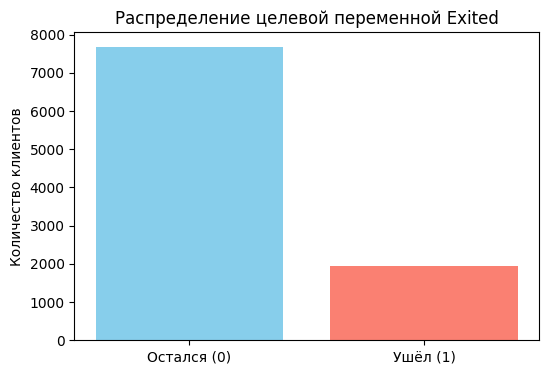

In [17]:
import matplotlib.pyplot as plt

# –ü–æ–¥—Å—á—ë—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
target_counts = data['Exited'].value_counts()
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –ø–æ –∫–ª–∞—Å—Å–∞–º:")
print(target_counts)

# –ü–æ–¥—Å—á—ë—Ç –¥–æ–ª–∏ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞
target_ratio = data['Exited'].value_counts(normalize=True)
print("\n–î–æ–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞:")
print(target_ratio)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(6,4))
plt.bar(target_counts.index.astype(str), target_counts.values, color=['skyblue', 'salmon'])
plt.xticks([0,1], ['–û—Å—Ç–∞–ª—Å—è (0)', '–£—à—ë–ª (1)'])
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π Exited')
plt.show()


> –í–∏–¥–∏–º, —á—Ç–æ —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è —Å–∏–ª—å–Ω–æ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∞:
> - 0 (–æ—Å—Ç–∞–ª—Å—è) ‚Üí 7‚ÄØ677 –∫–ª–∏–µ–Ω—Ç–æ–≤ (~80%)
> - 1 (—É—à—ë–ª) ‚Üí 1‚ÄØ950 –∫–ª–∏–µ–Ω—Ç–æ–≤ (~20%)

# 2. –û–±—É—á–µ–Ω–∏–µ —ç—Ç–∞–ª–æ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π

> –ü—Ä–æ–≤–µ–¥–µ–º —Ä–∞–∑–±–∏–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –≤—ã–±–æ—Ä–∫—É.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# –û—Ç–¥–µ–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
X = data.drop(columns=['Exited','Surname'])
y = data['Exited']

# –†–∞–∑–±–∏–µ–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω—É—é –≤—ã–±–æ—Ä–∫–∏
# test_size=0.2 ‚Üí 20% –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Ç–µ—Å—Ç–∞, random_state=42 –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# –°–∫–∞–ª–∏—Ä—É–µ–º —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

X_train_num = pd.DataFrame(
    scaler.fit_transform(X_train[num_features]),
    columns=num_features,
    index=X_train.index
)

X_test_num = pd.DataFrame(
    scaler.transform(X_test[num_features]),
    columns=num_features,
    index=X_test.index
)

# –í—ã–±–∏—Ä–∞–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
cat_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

X_train_cat = X_train[cat_features].copy()
X_test_cat  = X_test[cat_features].copy()

# –û–±—ä–µ–¥–∏–Ω—è–µ–º –æ–±—Ä–∞—Ç–Ω–æ
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test  = pd.concat([X_test_num, X_test_cat], axis=1)



# 3. –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è —Å —É—á–µ—Ç–æ–º –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞

> –ü–æ—á–∏—Ç–∞–≤ –Ω–µ–º–Ω–æ–≥–æ Habr, –Ω–∞—Ç—ã–∫–∞–µ–º—Å—è –Ω–∞ –º–µ—Ç–æ–¥ Tomek Links –¥–ª—è –±–æ—Ä—å–±—ã —Å –¥–∏—Å–±–∞–ª–∞–Ω—Å–æ–º –∫–ª–∞—Å—Å–æ–≤. –ü–æ–¥—Ö–æ–¥ —Å–ª–µ–¥—É—é—â–∏–π, –∏–¥–µ–Ω—Ç–∏—Ñ–∏—Ü–∏—Ä—É–µ—Ç –ø–∞—Ä—ã –±–ª–∏–∑–∫–∏—Ö —Å–æ—Å–µ–¥–µ–π, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –æ–¥–∏–Ω –ø—Ä–∏–º–µ—Ä –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∏—Ç –∫–ª–∞—Å—Å—É –º–µ–Ω—å—à–∏–Ω—Å—Ç–≤–∞, –∞ –¥—Ä—É–≥–æ–π - –∫–ª–∞—Å—Å—É –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞. –ü–æ—Å–ª–µ –∏—Ö –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏ —É–¥–∞–ª—è–µ—Ç—Å—è –ø—Ä–∏–º–µ—Ä –∏–∑ –∫–ª–∞—Å—Å–∞ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞, —á—Ç–æ –ø–æ–º–æ–≥–∞–µ—Ç —É–º–µ–Ω—å—à–∏—Ç—å –¥–∏—Å–±–∞–ª–∞–Ω—Å –¥–∞–Ω–Ω—ã—Ö.

> –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º Tomek Links —Å Random Undersampling

In [19]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Random Undersampling ---
rus = RandomUnderSampler(random_state=42)
X_res_rus, y_res_rus = rus.fit_resample(X_train, y_train)

# --- 2. –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ Tomek Links ---
tl = TomekLinks()
X_res_final, y_res_final = tl.fit_resample(X_res_rus, y_res_rus)

print(f"–†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–æ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏: {X_train.shape[0]}")
print(f"–ü–æ—Å–ª–µ Random Undersampling: {X_res_rus.shape[0]}")
print(f"–ü–æ—Å–ª–µ Tomek Links: {X_res_final.shape[0]}")

# --- 3. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è (–ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º Age –∏ Balance) ---

# --- –ü–æ–ª—É—á–∞–µ–º –∏–Ω–¥–µ–∫—Å—ã –∫–æ–ª–æ–Ω–æ–∫ ---
# --- –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ NumPy (–µ—Å–ª–∏ —ç—Ç–æ DataFrame) ---
def to_numpy(X):
    if hasattr(X, 'values'):
        return X.values
    return X

X_train_np = to_numpy(X_train)
X_res_rus_np = to_numpy(X_res_rus)
X_res_final_np = to_numpy(X_res_final)

# --- –ù–∞–π–¥—ë–º –∏–Ω–¥–µ–∫—Å—ã –∫–æ–ª–æ–Ω–æ–∫ –¥–ª—è Age –∏ Balance ---
cols = list(X_train.columns)
age_idx = cols.index('Age')
balance_idx = cols.index('Balance')

plt.figure(figsize=(18, 6))

# 1. –ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
plt.subplot(1, 3, 1)
plt.scatter(X_train_np[:, age_idx], X_train_np[:, balance_idx], c=y_train, alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title("–ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ")

# 2. –ü–æ—Å–ª–µ Random Undersampling
plt.subplot(1, 3, 2)
plt.scatter(X_res_rus_np[:, age_idx], X_res_rus_np[:, balance_idx], c=y_res_rus, alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title("–ü–æ—Å–ª–µ Random Undersampling")

# 3. –ü–æ—Å–ª–µ Tomek Links
plt.subplot(1, 3, 3)
plt.scatter(X_res_final_np[:, age_idx], X_res_final_np[:, balance_idx], c=y_res_final, alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title("–ü–æ—Å–ª–µ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è Tomek Links")

plt.tight_layout()
plt.show()



–†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–æ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏: 7701
–ü–æ—Å–ª–µ Random Undersampling: 3120
–ü–æ—Å–ª–µ Tomek Links: 2888


> –í–∏–¥–∏–º, —á—Ç–æ Tomek Links –ø–æ–∫–∞–∑–∞–ª –±–æ–ª–µ–µ —Ö–æ—Ä–æ—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç, —Ö–æ—Ç—å –∏ –¥–∞–Ω–Ω—ã—Ö –æ–Ω —É–±—Ä–∞–ª –±–æ–ª—å—à–µ

> –ü–æ—Å–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

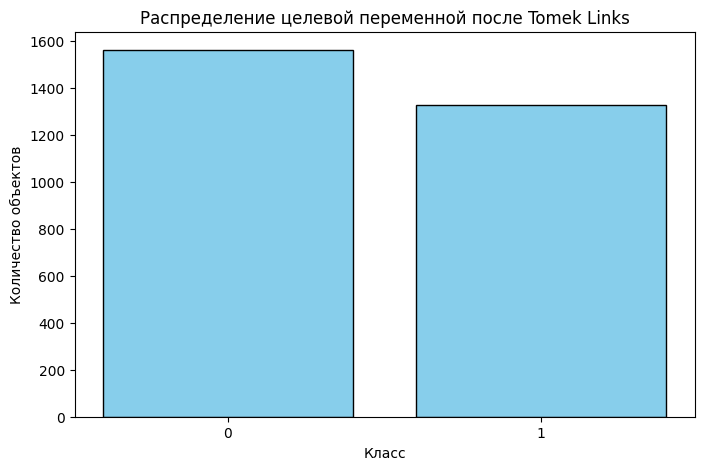

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º y_res_final –≤ Series (–¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –ø–æ–¥—Å—á—ë—Ç–∞)
y_final_series = pd.Series(y_res_final)

# –°—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞
class_counts = y_final_series.value_counts().sort_index()

# –°—Ç—Ä–æ–∏–º —Å—Ç–æ–ª–±—á–∞—Ç—É—é –¥–∏–∞–≥—Ä–∞–º–º—É
plt.figure(figsize=(8, 5))
plt.bar(class_counts.index.astype(str), class_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('–ö–ª–∞—Å—Å')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –ø–æ—Å–ª–µ Tomek Links')
plt.xticks(rotation=0)
plt.show()


In [21]:
pip install catboost


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


=== CatBoost ===
Train metrics:
              precision    recall  f1-score   support

           0      0.868     0.816     0.841      1560
           1      0.798     0.854     0.825      1328

    accuracy                          0.833      2888
   macro avg      0.833     0.835     0.833      2888
weighted avg      0.836     0.833     0.834      2888

Test metrics:
              precision    recall  f1-score   support

           0      0.927     0.811     0.865      1536
           1      0.501     0.749     0.600       390

    accuracy                          0.798      1926
   macro avg      0.714     0.780     0.733      1926
weighted avg      0.841     0.798     0.811      1926

Train: Accuracy=0.833, F1=0.825, ROC AUC=0.919
Test: Accuracy=0.798, F1=0.600, ROC AUC=0.858


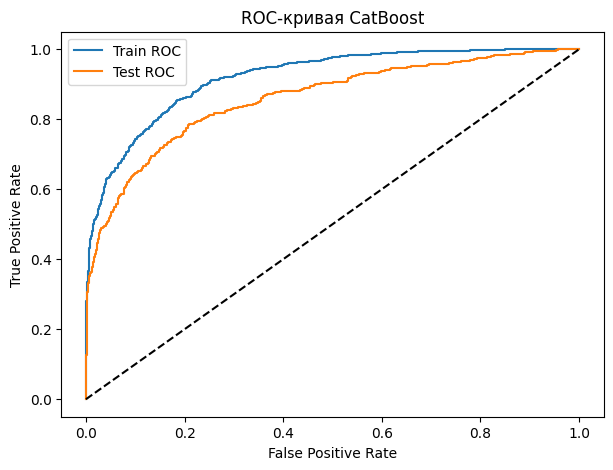

In [22]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, f1_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt

# --- –ú–æ–¥–µ–ª—å ---
cat_model = CatBoostClassifier(
    iterations=5000,
    learning_rate=0.0005,
    depth=6,
    l2_leaf_reg=3,
    class_weights=[0.7, 1.0],
    random_seed=42,
    verbose=False
)

# --- –û–±—É—á–µ–Ω–∏–µ ---
cat_model.fit(X_res_final, y_res_final)

# --- –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è ---
y_train_pred = cat_model.predict(X_res_final)
y_train_proba = cat_model.predict_proba(X_res_final)[:, 1]
y_test_pred = cat_model.predict(X_test)
y_test_proba = cat_model.predict_proba(X_test)[:, 1]

# --- –ú–µ—Ç—Ä–∏–∫–∏ ---
print("=== CatBoost ===")
print("Train metrics:")
print(classification_report(y_res_final, y_train_pred, digits=3))
print("Test metrics:")
print(classification_report(y_test, y_test_pred, digits=3))

print(f"Train: Accuracy={accuracy_score(y_res_final, y_train_pred):.3f}, "
      f"F1={f1_score(y_res_final, y_train_pred):.3f}, "
      f"ROC AUC={roc_auc_score(y_res_final, y_train_proba):.3f}")
print(f"Test: Accuracy={accuracy_score(y_test, y_test_pred):.3f}, "
      f"F1={f1_score(y_test, y_test_pred):.3f}, "
      f"ROC AUC={roc_auc_score(y_test, y_test_proba):.3f}")

# --- ROC-–∫—Ä–∏–≤–∞—è ---
fpr_train, tpr_train, _ = roc_curve(y_res_final, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr_train, tpr_train, label='Train ROC')
plt.plot(fpr_test, tpr_test, label='Test ROC')
plt.plot([0,1],[0,1],'k--')
plt.title('ROC-–∫—Ä–∏–≤–∞—è CatBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# 4. –ò—Ç–æ–≥–æ–≤–æ–µ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ


> –ü–æ–¥–±–µ—Ä–µ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏

In [23]:
import joblib
from itertools import product
from tqdm import tqdm
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

# --- –ë–∞–∑–æ–≤—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã ---
base_params = {
    'iterations': 5000,
    'learning_rate': 0.0005,
    'depth': 6,
    'l2_leaf_reg': 3,
    'class_weights': [0.7, 1.0],
    'random_seed': 42,
    'verbose': False,
    'eval_metric': 'F1',
}

# --- –õ–æ–∫–∞–ª—å–Ω—ã–µ –¥–∏–∞–ø–∞–∑–æ–Ω—ã ---
param_grid = {
    'iterations': [4500, 5000, 5500],
    'learning_rate': [0.0003, 0.0005, 0.0007],
    'depth': [5, 6, 7],
    'l2_leaf_reg': [2, 3, 4],
    'class_weights': [
        [0.6, 1.0],
        [0.7, 1.0],
        [0.8, 1.0]
    ]
}

# --- –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∫–æ–º–±–∏–Ω–∞—Ü–∏–π ---
param_combinations = list(product(
    param_grid['iterations'],
    param_grid['learning_rate'],
    param_grid['depth'],
    param_grid['l2_leaf_reg'],
    param_grid['class_weights']
))

print(f"–í—Å–µ–≥–æ –∫–æ–º–±–∏–Ω–∞—Ü–∏–π: {len(param_combinations)}")

best_model = None
best_f1 = -1
best_params = None

# --- –û—Å–Ω–æ–≤–Ω–æ–π —Ü–∏–∫–ª ---
for iterations, lr, depth, l2, weights in tqdm(param_combinations, desc="–õ–æ–∫–∞–ª—å–Ω—ã–π –ø–æ–∏—Å–∫"):
    params = base_params.copy()
    params.update({
        'iterations': iterations,
        'learning_rate': lr,
        'depth': depth,
        'l2_leaf_reg': l2,
        'class_weights': weights
    })

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True, verbose=False)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    if f1 > best_f1:
        best_f1 = f1
        best_model = model
        best_params = params

# --- –ò—Ç–æ–≥–∏ ---
print("üèÜ –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å:")
print(f"–ü–∞—Ä–∞–º–µ—Ç—Ä—ã: {best_params}")
print(f"F1: {best_f1:.3f}")




–í—Å–µ–≥–æ –∫–æ–º–±–∏–Ω–∞—Ü–∏–π: 243


–õ–æ–∫–∞–ª—å–Ω—ã–π –ø–æ–∏—Å–∫:   1%|          | 3/243 [00:15<20:56,  5.23s/it]


KeyboardInterrupt: 

> –í—Å–µ–≥–æ –∫–æ–º–±–∏–Ω–∞—Ü–∏–π: 243
>> –õ–æ–∫–∞–ª—å–Ω—ã–π –ø–æ–∏—Å–∫: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 243/243 [1:31:33<00:00, 22.61s/it]üèÜ –õ—É—á—à–∞—è > –º–æ–¥–µ–ª—å:
>>> –ü–∞—Ä–∞–º–µ—Ç—Ä—ã: {'iterations': 5500, 'learning_rate': 0.0007, 'depth': 6, 'l2_leaf_reg': 3, 'class_weights': [0.6, 1.0], 'random_seed': 42, 'verbose': False, 'eval_metric': 'F1'}
>>>>F1: 0.640

> –ü–æ–ø—Ä–æ–±—É–µ–º –ø–æ–¥–æ–±—Ä–∞—Ç—å –ø–æ—Ä–æ–≥ –¥–ª—è –º–∏–Ω–æ—Ä–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞, —á—Ç–æ–±—ã –ø–æ–≤—ã—Å–∏—Ç—å –µ–≥–æ –∑–Ω–∞—á–∏–º–æ—Å—Ç—å. –ê —Ç–∞–∫–∂–µ –ø—Ä–æ–≤–µ–¥–µ–º K-Fold Cross-Validation.

# –ú–µ—Ç–æ–¥ –≥–ª–∞–≤–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç

In [24]:
X_res_final

CreditScore       Age  Tenure   Balance  NumOfProducts  EstimatedSalary  \
0        0.207407 -1.181818    0.25  0.141765            1.0         0.359358   
1       -0.733333  0.181818   -0.75  0.282641            0.0         0.498322   
2        0.444444 -0.090909    1.00  0.320152            0.0        -0.547773   
3        0.170370  0.545455    0.75 -0.085658            1.0        -0.936886   
4       -0.888889  0.000000   -1.00  0.365013            1.0        -0.164869   
...           ...       ...     ...       ...            ...              ...   
2883    -0.518519  0.909091   -1.00  0.204525            0.0         0.813346   
2884    -0.103704  1.636364   -1.00  0.207891            0.0        -0.195185   
2885     0.822222  1.727273    1.25  0.026544            2.0        -0.238964   
2886     0.651852  0.363636    0.75 -0.759969            0.0         0.930132   
2887    -0.785185  0.181818    0.25 -0.759969            0.0        -0.634251   

      Geography  Gender  HasCrCard  IsActiveMember  
0             0       0          0               1  
1             1       1          0               1  
2             0       1          1               1  
3             1       1          1               0  
4             2       1          0               1  
...         ...     ...        ...             ...  
2883          0       0          0               0  
2884          1       0          1               0  
2885          1       1          1               1  
2886          2       0          1               0  
2887          2       0          0               0  

[2888 rows x 10 columns]

In [25]:
from math import copysign
from numbers import Number
from typing import Iterable


def prod_scalar(vector_a: Iterable[Number], vector_b: Iterable[Number]) -> float:

    if len(vector_a) != len(vector_b):
        raise ValueError("–î–ª–∏–Ω—ã –≤–µ–∫—Ç–æ—Ä–æ–≤ –¥–æ–ª–∂–Ω—ã —Å–æ–≤–ø–∞–¥–∞—Ç—å –¥–ª—è —Å–∫–∞–ª—è—Ä–Ω–æ–≥–æ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏—è")
    return float(sum(float(a) * float(b) for a, b in zip(vector_a, vector_b)))


def euclidean_norm(vector: Iterable[Number]) -> float:
    return (prod_scalar(vector, vector))**0.5


def sign(value: float) -> float:

    return 1.0 if value == 0.0 else copysign(1.0, value)

In [26]:
from __future__ import annotations
from typing import List, Tuple, Iterable, Union, Any
from copy import deepcopy
from math import sqrt


Number = Union[int, float]


class Matrix:
    def __init__(self, values: Iterable[Iterable[Number]]) -> None:
        if (
            not values
            or not isinstance(values, (list, tuple))
            or not isinstance(values[0], (list, tuple))
        ):
            raise ValueError("–î–∞–Ω–Ω—ã–µ –º–∞—Ç—Ä–∏—Ü—ã –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –Ω–µ–ø—É—Å—Ç—ã–º —Å–ø–∏—Å–∫–æ–º —Å–ø–∏—Å–∫–æ–≤")

        row_count: int = len(values)
        col_count: int = len(values[0])

        for row in values:
            if len(row) != col_count:
                raise ValueError("–í—Å–µ —Å—Ç—Ä–æ–∫–∏ –º–∞—Ç—Ä–∏—Ü—ã –¥–æ–ª–∂–Ω—ã –∏–º–µ—Ç—å –æ–¥–∏–Ω–∞–∫–æ–≤—É—é –¥–ª–∏–Ω—É")

        self._values: List[List[float]] = [
            [float(element) for element in row] for row in values
        ]
        self._row_count: int = row_count
        self._col_count: int = col_count

    @staticmethod
    def zeros(row_count: int, col_count: int) -> "Matrix":
        return Matrix([[0.0] * col_count for _ in range(row_count)])

    @staticmethod
    def eye(size: int) -> "Matrix":
        identity = Matrix.zeros(size, size)
        for index in range(size):
            identity._values[index][index] = 1.0
        return identity

    @property
    def shape(self) -> Tuple[int, int]:
        return self._row_count, self._col_count

    def copy(self) -> "Matrix":
        return Matrix(deepcopy(self._values))

    def is_square(self) -> bool:
        return self._row_count == self._col_count

    def is_symmetric(self, tolerance: float = 1e-12) -> bool:
        if not self.is_square():
            return False
        size: int = self._row_count
        for row_index in range(size):
            for col_index in range(row_index + 1, size):
                if abs(self._values[row_index][col_index] - self._values[col_index][row_index]) > tolerance:
                    return False
        return True

    def __getitem__(self, row_index: int) -> List[float]:
        return self._values[row_index]

    def __setitem__(self, row_index: int, new_row: Iterable[Number]) -> None:

        if len(new_row) != self._col_count:
            raise ValueError("–î–ª–∏–Ω–∞ —Å—Ç—Ä–æ–∫–∏ –Ω–µ —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å —á–∏—Å–ª–æ–º —Å—Ç–æ–ª–±—Ü–æ–≤")

        self._values[row_index] = [float(element) for element in new_row]

    def __add__(self, other: Union["Matrix", Number]) -> "Matrix":
        if isinstance(other, Matrix):
            self_rows, self_cols = self.shape
            other_rows, other_cols = other.shape
            if (self_rows, self_cols) != (other_rows, other_cols):
                raise ValueError("–†–∞–∑–º–µ—Ä—ã –º–∞—Ç—Ä–∏—Ü –Ω–µ —Å–æ–≤–ø–∞–¥–∞—é—Ç –¥–ª—è —Å–ª–æ–∂–µ–Ω–∏—è")
            return Matrix(
                [
                    [self._values[row_index][col_index] + other._values[row_index][col_index] for col_index in range(self_cols)]
                    for row_index in range(self_rows)
                ]
            )
        elif isinstance(other, (int, float)):
            self_rows, self_cols = self.shape
            return Matrix(
                [
                    [self._values[row_index][col_index] + float(other) for col_index in range(self_cols)]
                    for row_index in range(self_rows)
                ]
            )
        else:
            raise TypeError("–ü–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç—Å—è —Å–ª–æ–∂–µ–Ω–∏–µ —Ç–æ–ª—å–∫–æ —Å Matrix –∏–ª–∏ —á–∏—Å–ª–æ–º")

    def __sub__(self, other: Union["Matrix", Number]) -> "Matrix":
        if isinstance(other, Matrix):
            self_rows, self_cols = self.shape
            other_rows, other_cols = other.shape
            if (self_rows, self_cols) != (other_rows, other_cols):
                raise ValueError("–†–∞–∑–º–µ—Ä—ã –º–∞—Ç—Ä–∏—Ü –Ω–µ —Å–æ–≤–ø–∞–¥–∞—é—Ç –¥–ª—è –≤—ã—á–∏—Ç–∞–Ω–∏—è")
            return Matrix(
                [
                    [self._values[row_index][col_index] - other._values[row_index][col_index] for col_index in range(self_cols)]
                    for row_index in range(self_rows)
                ]
            )
        elif isinstance(other, (int, float)):
            self_rows, self_cols = self.shape
            return Matrix(
                [
                    [self._values[row_index][col_index] - float(other) for col_index in range(self_cols)]
                    for row_index in range(self_rows)
                ]
            )
        else:
            raise TypeError("–ü–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç—Å—è –≤—ã—á–∏—Ç–∞–Ω–∏–µ —Ç–æ–ª—å–∫–æ —Å Matrix –∏–ª–∏ —á–∏—Å–ª–æ–º")

    def __rmul__(self, other: Number) -> "Matrix":
        return self.__mul__(other)

    def __mul__(self, other: Union["Matrix", Number]) -> "Matrix":
        if isinstance(other, (int, float)):
            row_count, col_count = self.shape
            factor = float(other)
            return Matrix(
                [
                    [self._values[row_index][col_index] * factor for col_index in range(col_count)]
                    for row_index in range(row_count)
                ]
            )
        elif isinstance(other, Matrix):
            left_rows, left_cols = self.shape
            right_rows, right_cols = other.shape
            if left_cols != right_rows:
                raise ValueError("–§–æ—Ä–º—ã –º–∞—Ç—Ä–∏—Ü –Ω–µ—Å–æ–≤–º–µ—Å—Ç–∏–º—ã –¥–ª—è —É–º–Ω–æ–∂–µ–Ω–∏—è")
            result = Matrix.zeros(left_rows, right_cols)
            for row_index in range(left_rows):
                for common_index in range(left_cols):
                    left_value = self._values[row_index][common_index]
                    if left_value == 0.0:
                        continue
                    result_row = result._values[row_index]
                    other_row = other._values[common_index]
                    for col_index in range(right_cols):
                        result_row[col_index] += left_value * other_row[col_index]
            return result
        else:
            raise TypeError("–ü–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç—Å—è —É–º–Ω–æ–∂–µ–Ω–∏–µ —Ç–æ–ª—å–∫–æ —Å Matrix –∏–ª–∏ —á–∏—Å–ª–æ–º")

    def transposed(self) -> "Matrix":
        row_count, col_count = self.shape
        return Matrix([[self._values[row_index][col_index] for row_index in range(row_count)] for col_index in range(col_count)])

    @staticmethod
    def outer(vector_left: Iterable[Number], vector_right: Iterable[Number]) -> "Matrix":
        return Matrix(
            [
                [float(vector_left[row_index]) * float(vector_right[col_index]) for col_index in range(len(vector_right))]
                for row_index in range(len(vector_left))
            ]
        )

    def norm(self) -> float:
        squared_sum: float = 0.0
        for row in self._values:
            for value in row:
                squared_sum += value * value
        return sqrt(squared_sum)

    def diagonal(self) -> List[float]:
        if not self.is_square():
            raise ValueError("–î–∏–∞–≥–æ–Ω–∞–ª—å –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ —Ç–æ–ª—å–∫–æ –¥–ª—è –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã—Ö –º–∞—Ç—Ä–∏—Ü")
        return [self._values[index][index] for index in range(self._row_count)]

    def __repr__(self) -> str:
        return str(self)

    def __str__(self) -> str:
        formatted_rows: List[str] = []
        for row in self._values:
            formatted_rows.append("[" + "  ".join(f"{value: .6g}" for value in row) + "]")
        return "\n".join(formatted_rows)

In [27]:
from typing import Tuple, Union



def qr_decomposition_householder(matrix: "Matrix") -> Tuple["Matrix", "Matrix"]:
    """
    QR-—Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã –º–µ—Ç–æ–¥–æ–º –æ—Ç—Ä–∞–∂–µ–Ω–∏–π –•–∞—É—Å—Ö–æ–ª–¥–µ—Ä–∞

    :return: tuple(Q, R), –≥–¥–µ Q ‚Äî (n x n), R ‚Äî (n x m).
    """

    r_matrix: Matrix = matrix.copy()
    row_count, col_count = r_matrix.shape
    q_matrix: Matrix = Matrix.eye(row_count)

    for pivot_index in range(min(row_count, col_count) - 1):
        # –ë–µ—Ä—ë–º —Å—Ç–æ–ª–±–µ—Ü pivot_index, –Ω–∞—á–∏–Ω–∞—è —Å —Å—Ç—Ä–æ–∫–∏ pivot_index
        column_tail: list[float] = [r_matrix[row_index][pivot_index] for row_index in range(pivot_index, row_count)]
        column_tail_norm: float = euclidean_norm(column_tail)
        if column_tail_norm == 0.0:
            continue

        unit_first: list[float] = [0.0] * (row_count - pivot_index)
        unit_first[0] = 1.0

        alpha_value: float = sign(column_tail[0]) * column_tail_norm

        # u = x + alpha * e1
        householder_raw: list[float] = [
            column_tail[idx] + alpha_value * unit_first[idx] for idx in range(row_count - pivot_index)
        ]
        householder_norm: float = euclidean_norm(householder_raw)
        if householder_norm == 0.0:
            continue

        # v = u / ||u||
        householder_vector: list[float] = [component / householder_norm for component in householder_raw]

        reflector_full: list[float] = [0.0] * row_count
        for local_index, value in enumerate(householder_vector):
            reflector_full[pivot_index + local_index] = value

        # –ú–∞—Ç—Ä–∏—Ü–∞ –æ—Ç—Ä–∞–∂–µ–Ω–∏—è H = I - 2 * v v^T
        identity_matrix: Matrix = Matrix.eye(row_count)
        outer_product: Matrix = Matrix.outer(reflector_full, reflector_full)
        householder_matrix: Matrix = identity_matrix - (2.0 * outer_product)

        r_matrix = householder_matrix * r_matrix
        q_matrix = q_matrix * householder_matrix

    return q_matrix, r_matrix


def qr_algorithm(
    matrix: "Matrix",
    max_iterations: int = 1000,
    tolerance: float = 1e-12,
    return_eigenvectors: bool = False
) -> Tuple[list[float], Matrix | None]:
    """
    QR-–∞–ª–≥–æ—Ä–∏—Ç–º –±–µ–∑ —Å–¥–≤–∏–≥–æ–≤ –¥–ª—è –ø—Ä–∏–±–ª–∏–∂—ë–Ω–Ω–æ–≥–æ –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏—è —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
    """
    if not matrix.is_square():
        raise ValueError("QR-–∞–ª–≥–æ—Ä–∏—Ç–º —Ç—Ä–µ–±—É–µ—Ç –∫–≤–∞–¥—Ä–∞—Ç–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É")

    size, _ = matrix.shape
    iterated_matrix: Matrix = matrix.copy()
    eigenvectors_matrix: Matrix = Matrix.eye(size)

    for _iteration_index in range(max_iterations):
        q_matrix, r_matrix = qr_decomposition_householder(iterated_matrix)
        iterated_matrix = r_matrix * q_matrix

        eigenvectors_matrix = eigenvectors_matrix * q_matrix

        sum_of_squares_offdiag: float = 0.0
        for row_index in range(size):
            for col_index in range(0, row_index):
                value = iterated_matrix[row_index][col_index]
                sum_of_squares_offdiag += value * value
        offdiag_norm: float = sum_of_squares_offdiag**0.5
        if offdiag_norm < tolerance:
            break

    eigenvalues: list[float] = iterated_matrix.diagonal()

    if return_eigenvectors and matrix.is_symmetric():
        normalized_vectors: Matrix = eigenvectors_matrix.copy()
        for col_index in range(size):
            column_values: list[float] = [normalized_vectors[row_index][col_index] for row_index in range(size)]
            column_norm: float = euclidean_norm(column_values)
            if column_norm != 0.0:
                inv_norm: float = 1.0 / column_norm
                for row_index in range(size):
                    normalized_vectors[row_index][col_index] *= inv_norm
        return eigenvalues, normalized_vectors

    return eigenvalues, None

In [28]:

if __name__ == "__main__":
    A = Matrix([
        [4.0, 1.0, 1.0],
        [1.0, 3.0, 0.0],
        [1.0, 0.0, 2.0],
    ])

    vals, _ = qr_algorithm(A)
    print("Eigenvectors:", vals)

    vals2, vecs = qr_algorithm(A, return_eigenvectors=True)
    print("Eigenvalues (sym):", vals)
    print("Eigenvectors (columns):\n", vecs)

Eigenvectors: [4.87938524157182, 2.6527036446661287, 1.4679111137620435]
Eigenvalues (sym): [4.87938524157182, 2.6527036446661287, 1.4679111137620435]
Eigenvectors (columns):
 [-0.84403   0.293128  -0.449099]
[-0.449099  -0.84403   0.293128]
[-0.293128   0.449099   0.84403]


In [29]:
# 1. –¶–µ–Ω—Ç—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö (—Å–ø–∏—Å–∫–∏ —Å–ø–∏—Å–∫–æ–≤)
def center_data(X):
    n_rows = len(X)
    n_cols = len(X[0])
    means = [sum(X[i][j] for i in range(n_rows))/n_rows for j in range(n_cols)]
    X_centered = [[X[i][j] - means[j] for j in range(n_cols)] for i in range(n_rows)]
    return X_centered, means

# 2. –ö–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞
def covariance_matrix(X_centered):
    n_rows = len(X_centered)
    n_cols = len(X_centered[0])
    cov = [[0.0]*n_cols for _ in range(n_cols)]
    for i in range(n_cols):
        for j in range(n_cols):
            s = sum(X_centered[k][i] * X_centered[k][j] for k in range(n_rows))
            cov[i][j] = s / (n_rows - 1)
    return cov

# 3. –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ qr_algorithm
def pca_qr(X):
    X_centered, means = center_data(X)
    cov = covariance_matrix(X_centered)
    A = Matrix(cov)

    # –ü–æ–ª—É—á–∞–µ–º —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏ –≤–µ–∫—Ç–æ—Ä—ã
    eigvals, eigvecs = qr_algorithm(A, return_eigenvectors=True)

    # –î–æ–ª—è –æ–±—ä—è—Å–Ω—ë–Ω–Ω–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–∏
    total_variance = sum(eigvals)
    explained_ratio = [v / total_variance for v in eigvals]

    # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –≤ –≥–ª–∞–≤–Ω—ã–µ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã
    # X_pca = X_centered @ eigvecs (–Ω–∞ —Å–ø–∏—Å–∫–∞—Ö)
    n_rows = len(X_centered)
    n_cols = len(X_centered[0])
    X_pca = [[sum(X_centered[i][k] * eigvecs[k][j] for k in range(n_cols))
              for j in range(n_cols)] for i in range(n_rows)]

    return eigvals, eigvecs, explained_ratio, X_pca

In [30]:
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º DataFrame –≤ —Å–ø–∏—Å–æ–∫ —Å–ø–∏—Å–∫–æ–≤
X_list = X_res_final.values.tolist()

# –¶–µ–Ω—Ç—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ
X_centered, means = center_data(X_list)

# –ö–æ–≤–∞—Ä–∏–∞—Ü–∏—è
cov = covariance_matrix(X_centered)

# QR-–∞–ª–≥–æ—Ä–∏—Ç–º
A = Matrix(cov)
eigvals, eigvecs = qr_algorithm(A, return_eigenvectors=True)

# –û–±—ä—è—Å–Ω—ë–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è
total_var = sum(eigvals)
explained_ratio = [v / total_var for v in eigvals]

# –ü—Ä–æ–µ–∫—Ü–∏—è –Ω–∞ –≥–ª–∞–≤–Ω—ã–µ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã
n_rows = len(X_centered)
n_cols = len(X_centered[0])
X_pca = [[sum(X_centered[i][k] * eigvecs[k][j] for k in range(n_cols))
          for j in range(n_cols)] for i in range(n_rows)]

X_pca

[[1.4911703059627484,
  0.7712114617702126,
  -0.22613806427132316,
  0.2231265316329792,
  0.1336524359229869,
  0.34161125537285647,
  0.03287598030448368,
  0.8378993559725909,
  -0.6697214837538028,
  -0.41193399345298765],
 [-0.03196090043170377,
  -0.29232160258566037,
  1.0582123253287894,
  -0.5363708235963455,
  -0.09294504460471593,
  0.4834930242934566,
  -0.7630561955723976,
  0.2825315187089764,
  -0.403559791692156,
  -0.5601577236987128],
 [0.35172553980082716,
  0.7905419087697917,
  -0.5546764973995358,
  0.18748341230976273,
  -1.0733405276452714,
  -0.7102730560339312,
  -0.6788218568668235,
  0.10649753378542205,
  -0.2867518130226816,
  0.29809583554423325],
 [-0.15632497861662234,
  -0.2194569084674583,
  -0.5173958003969221,
  0.6614177736348771,
  -0.06411970159139817,
  -1.0356195273558608,
  0.004486163302478741,
  -0.7091798950969016,
  -0.04023213069849676,
  0.10558270162517192],
 [0.2549238751356752,
  -1.3313090326289005,
  1.0977122627365676,
  -0.236386

In [31]:
import pandas as pd

# X_pca ‚Äî —ç—Ç–æ —Å–ø–∏—Å–æ–∫ —Å–ø–∏—Å–∫–æ–≤, —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å (n_rows, n_cols)
n_cols = len(X_pca[0])

# –°–æ–∑–¥–∞—ë–º –∏–º–µ–Ω–∞ –∫–æ–ª–æ–Ω–æ–∫ –¥–ª—è –≥–ª–∞–≤–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç
pc_columns = [f'PC{i+1}' for i in range(n_cols)]

# –ü—Ä–µ–≤—Ä–∞—â–∞–µ–º –≤ DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=pc_columns)

# –ï—Å–ª–∏ —Ö–æ—á–µ—à—å —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –∏–Ω–¥–µ–∫—Å—ã –∏—Å—Ö–æ–¥–Ω–æ–≥–æ DataFrame
X_pca_df.index = X_res_final.index

# –ü—Ä–æ–≤–µ—Ä–∫–∞
display(X_pca_df.head())

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.491170  0.771211 -0.226138  0.223127  0.133652  0.341611  0.032876   
1 -0.031961 -0.292322  1.058212 -0.536371 -0.092945  0.483493 -0.763056   
2  0.351726  0.790542 -0.554676  0.187483 -1.073341 -0.710273 -0.678822   
3 -0.156325 -0.219457 -0.517396  0.661418 -0.064120 -1.035620  0.004486   
4  0.254924 -1.331309  1.097712 -0.236386  0.781233 -0.180639 -0.645583   

        PC8       PC9      PC10  
0  0.837899 -0.669721 -0.411934  
1  0.282532 -0.403560 -0.560158  
2  0.106498 -0.286752  0.298096  
3 -0.709180 -0.040232  0.105583  
4  0.194416 -0.688860 -0.490900


===== MODEL PERFORMANCE =====
Set            Accuracy    F1 Score    ROC AUC     
--------------------------------------------------
Train          0.804       0.810       0.905       
Validation     0.773       0.795       0.886       
Test           0.740       0.735       0.857       
--------------------------------------------------

--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

           0      0.837     0.673     0.746       327
           1      0.660     0.829     0.735       251

    accuracy                          0.740       578
   macro avg      0.748     0.751     0.740       578
weighted avg      0.760     0.740     0.741       578



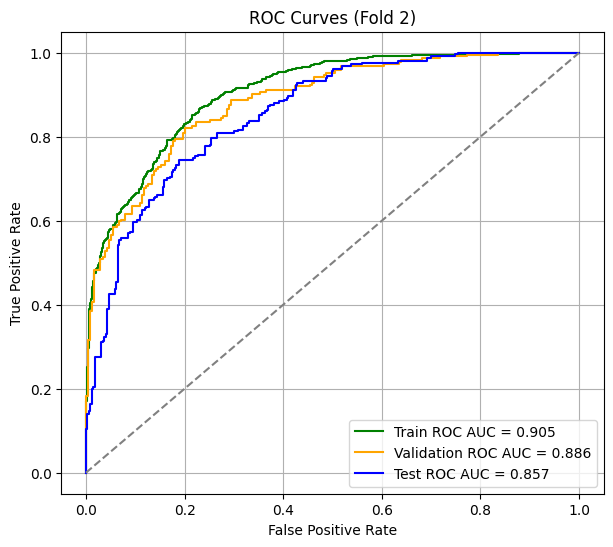

In [35]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# --- –ü–∞—Ä–∞–º–µ—Ç—Ä—ã ---
best_model_fold = 2
best_model_thresh = 0.465

# --- –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–∏ ---
cat_model = CatBoostClassifier(
    iterations=5500,
    learning_rate=0.0007,
    depth=6,
    l2_leaf_reg=3,
    class_weights=[0.6, 1.0],
    random_seed=42,
    eval_metric='F1',
    verbose=0  # –±–µ–∑ –≤—ã–≤–æ–¥–∞ –æ–±—É—á–µ–Ω–∏—è
)

# --- K-Fold ---
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# --- –ü–æ–ª—É—á–∞–µ–º –¥–∞–Ω–Ω—ã–µ –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ —Ñ–æ–ª–¥–∞ ---
fold = 1
for train_idx, test_idx in kfold.split(X_pca_df, y_res_final):
    if fold == best_model_fold:
        X_train_fold, X_test_fold = X_pca_df.iloc[train_idx], X_pca_df.iloc[test_idx]
        y_train_fold, y_test_fold = y_res_final.iloc[train_idx], y_res_final.iloc[test_idx]
        break
    fold += 1

# --- –î–µ–ª–∏–º —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –Ω–∞ train/validation ---
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_fold, y_train_fold, test_size=0.2, random_state=42
)

# --- –û–±—É—á–µ–Ω–∏–µ –±–µ–∑ –≤—ã–≤–æ–¥–∞ ---
cat_model.fit(X_train_split, y_train_split, eval_set=(X_val_split, y_val_split), verbose=0)

# --- –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è ---
y_proba_train = cat_model.predict_proba(X_train_split)[:, 1]
y_proba_val   = cat_model.predict_proba(X_val_split)[:, 1]
y_proba_test  = cat_model.predict_proba(X_test_fold)[:, 1]

# --- –ü—Ä–∏–º–µ–Ω—è–µ–º –ø–æ—Ä–æ–≥ ---
y_pred_train = (y_proba_train >= best_model_thresh).astype(int)
y_pred_val   = (y_proba_val >= best_model_thresh).astype(int)
y_pred_test  = (y_proba_test >= best_model_thresh).astype(int)

# --- –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–≤–æ–¥–∞ –º–µ—Ç—Ä–∏–∫ ---
def get_metrics(y_true, y_pred, y_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_proba)
    }

# --- –°—á–∏—Ç–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏ ---
metrics_train = get_metrics(y_train_split, y_pred_train, y_proba_train)
metrics_val   = get_metrics(y_val_split, y_pred_val, y_proba_val)
metrics_test  = get_metrics(y_test_fold, y_pred_test, y_proba_test)

# --- –ü–µ—á–∞—Ç–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏ –∫—Ä–∞—Å–∏–≤–æ ---
print("\n===== MODEL PERFORMANCE =====")
print(f"{'Set':<15}{'Accuracy':<12}{'F1 Score':<12}{'ROC AUC':<12}")
print("-" * 50)
print(f"{'Train':<15}{metrics_train['Accuracy']:<12.3f}{metrics_train['F1 Score']:<12.3f}{metrics_train['ROC AUC']:<12.3f}")
print(f"{'Validation':<15}{metrics_val['Accuracy']:<12.3f}{metrics_val['F1 Score']:<12.3f}{metrics_val['ROC AUC']:<12.3f}")
print(f"{'Test':<15}{metrics_test['Accuracy']:<12.3f}{metrics_test['F1 Score']:<12.3f}{metrics_test['ROC AUC']:<12.3f}")
print("-" * 50)

# --- –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –≤—ã–≤–æ–¥–∏–º –ø–æ–¥—Ä–æ–±–Ω—ã–π classification_report ---
print("\n--- Classification Report (Test Set) ---")
print(classification_report(y_test_fold, y_pred_test, digits=3))

# --- ROC-–∫—Ä–∏–≤—ã–µ ---
fpr_train, tpr_train, _ = roc_curve(y_train_split, y_proba_train)
fpr_val, tpr_val, _     = roc_curve(y_val_split, y_proba_val)
fpr_test, tpr_test, _   = roc_curve(y_test_fold, y_proba_test)

plt.figure(figsize=(7,6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC AUC = {metrics_train["ROC AUC"]:.3f}', color='green')
plt.plot(fpr_val, tpr_val, label=f'Validation ROC AUC = {metrics_val["ROC AUC"]:.3f}', color='orange')
plt.plot(fpr_test, tpr_test, label=f'Test ROC AUC = {metrics_test["ROC AUC"]:.3f}', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curves (Fold {best_model_fold})')
plt.legend()
plt.grid(True)
plt.show()
